In [ ]:
from google.colab import files
uploaded = files.upload()

Saving prj10.fasta to prj10.fasta


**Protein Sequence Analysis :**
---
---
The program loads a file with protein sequences and breaks each sequence down into 9-mer overlapping peptides. It computes the Shannon entropy for each of these peptides to gauge the uncertainty or complexity based on how frequently different amino acids appear. This analysis provides insights into the variation and spread of amino acids in the protein sequences.

In [ ]:
from collections import Counter
import math

class ProteinSequenceAnalyzer:
    def __init__(self, file_path):
        self.sequences = self.read_fasta(file_path)

    def read_fasta(self, file_path):
        sequences = []
        with open(file_path, 'r') as file:
            sequence = ''
            for line in file:
                line = line.strip()
                if line.startswith('>'):
                    if sequence:
                        sequences.append(sequence)
                    sequence = ''
                else:
                    sequence += line
            if sequence:
                sequences.append(sequence)
        return sequences

    def extract_9mer_sequences(self, sequence):
        return [sequence[i:i+9] for i in range(len(sequence) - 8)]

    def calculate_shannon_entropy(self, sequence):
        n = len(sequence)
        counts = Counter(sequence)
        entropy = 0
        for count in counts.values():
            probability = count / n
            entropy -= probability * math.log(probability, 2)
        return entropy

    def analyze_sequences(self):
        sequences = []
        shannon_entropies = []
        for seq in self.sequences:
            kmer_sequences = self.extract_9mer_sequences(seq)
            for kmer in kmer_sequences:
                entropy = self.calculate_shannon_entropy(kmer)
                sequences.append(kmer)
                shannon_entropies.append(entropy)
        return sequences,shannon_entropies


analyzer = ProteinSequenceAnalyzer("prj10.fasta")
(sequences,shannon_entropies) = analyzer.analyze_sequences()
M = len(sequences)
print(f"Total number of 9-mer overlapping peptide sequences : {M}")
print(f"\nPeptide sequences :\n{sequences}")
print(f"\nShannon Entropies:\n{shannon_entropies}")

Total number of 9-mer overlapping peptide sequences : 1526

Peptide sequences :
['MSQQVGNSI', 'SQQVGNSIR', 'QQVGNSIRR', 'QVGNSIRRK', 'VGNSIRRKL', 'GNSIRRKLV', 'NSIRRKLVI', 'SIRRKLVIV', 'IRRKLVIVG', 'RRKLVIVGD', 'RKLVIVGDG', 'KLVIVGDGA', 'LVIVGDGAC', 'VIVGDGACG', 'IVGDGACGK', 'VGDGACGKT', 'GDGACGKTC', 'DGACGKTCL', 'GACGKTCLL', 'ACGKTCLLI', 'CGKTCLLIV', 'GKTCLLIVF', 'KTCLLIVFS', 'TCLLIVFSK', 'CLLIVFSKG', 'LLIVFSKGQ', 'LIVFSKGQF', 'IVFSKGQFP', 'VFSKGQFPE', 'FSKGQFPEV', 'SKGQFPEVY', 'KGQFPEVYV', 'GQFPEVYVP', 'QFPEVYVPT', 'FPEVYVPTV', 'PEVYVPTVF', 'EVYVPTVFE', 'VYVPTVFEN', 'YVPTVFENY', 'VPTVFENYV', 'PTVFENYVA', 'TVFENYVAD', 'VFENYVADV', 'FENYVADVE', 'ENYVADVEV', 'NYVADVEVD', 'YVADVEVDG', 'VADVEVDGR', 'ADVEVDGRR', 'DVEVDGRRV', 'VEVDGRRVE', 'EVDGRRVEL', 'VDGRRVELA', 'DGRRVELAL', 'GRRVELALW', 'RRVELALWD', 'RVELALWDT', 'VELALWDTA', 'ELALWDTAG', 'LALWDTAGQ', 'ALWDTAGQE', 'LWDTAGQED', 'WDTAGQEDY', 'DTAGQEDYD', 'TAGQEDYDR', 'AGQEDYDRL', 'GQEDYDRLR', 'QEDYDRLRP', 'EDYDRLRPL', 'DYDRLRPLS', 'YDRLRPLS

**Random Peptide Sequence Generation :**
---
---
The program creates a set of random 9-mer peptide sequences using a random selection from a pool of 20 amino acids. For each sequence, it calculates the Shannon entropy to assess the diversity and distribution of amino acids. This provides a benchmark to compare with the protein sequences analyzed earlier, giving context to the complexity of natural sequences.

In [ ]:
import random
import math

def generate_random_sequence(length):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    return ''.join(random.choice(amino_acids) for _ in range(length))

def shannon_entropy(sequence):
    total_count = len(sequence)
    frequency = {aa: sequence.count(aa) / total_count for aa in set(sequence)}
    entropy = -sum(prob * math.log2(prob) for prob in frequency.values())
    return entropy

def main():
    M = len(sequences)
    rentropy = {}

    for i in range(M):
        random_sequence = generate_random_sequence(9)
        entropy = shannon_entropy(random_sequence)
        rentropy[random_sequence] = entropy

    return rentropy

if __name__ == "__main__":
  print(f"Total number of random 9-mer peptide sequences : {M}")
  print(f"\nRandomly generated 9-mer sequences with their corresponding Shannon entropy :\n{main()}")

Total number of random 9-mer peptide sequences : 1526

Randomly generated 9-mer sequences with their corresponding Shannon entropy :
{'DLPFKRCNY': 3.169925001442312, 'CYTKAKPGT': 2.725480556997868, 'RLGLCIMSP': 2.9477027792200903, 'EAENCWYKA': 2.725480556997868, 'HSEALVWAW': 2.725480556997868, 'TWHTRSVYM': 2.94770277922009, 'KRYYMGRRA': 2.4193819456463714, 'SSHLETKPL': 2.725480556997868, 'QGTPNKGDR': 2.94770277922009, 'PFWYKYIFI': 2.503258334775646, 'LQFSQYHMA': 2.94770277922009, 'QVWAHAMAL': 2.6416041678685933, 'HAECNHFCC': 2.4193819456463714, 'MDHNTVQLE': 3.169925001442312, 'MTVQIILLP': 2.725480556997868, 'NCQFYQLHD': 2.94770277922009, 'SVDKGMGKE': 2.725480556997868, 'ATRDVYKNV': 2.94770277922009, 'YQGSRFVQF': 2.725480556997868, 'FFCKNQYTM': 2.9477027792200903, 'SYSAAQDNC': 2.725480556997868, 'ANFWGFRPK': 2.9477027792200903, 'AKNKLNGSE': 2.725480556997868, 'WGLRIWIRS': 2.5032583347756456, 'LYLFHPNSI': 2.9477027792200903, 'TLDDNQNDF': 2.4193819456463714, 'YDYSTLHMG': 2.947702779220090

**Visualization of Shannon Entropy for Real and Random 9-mer Sequences :**
---
---
This part involves visualizing the Shannon entropy of 9-mer sequences from both real protein sequences and randomly generated sequences using a box plot. The box plot provides a clear comparison of the distribution of entropy values for the two types of sequences, allowing you to easily observe any differences in their complexity and diversity. By plotting the entropies side by side, you can identify trends and patterns that may be useful in understanding the behavior of natural protein sequences compared to random sequences.

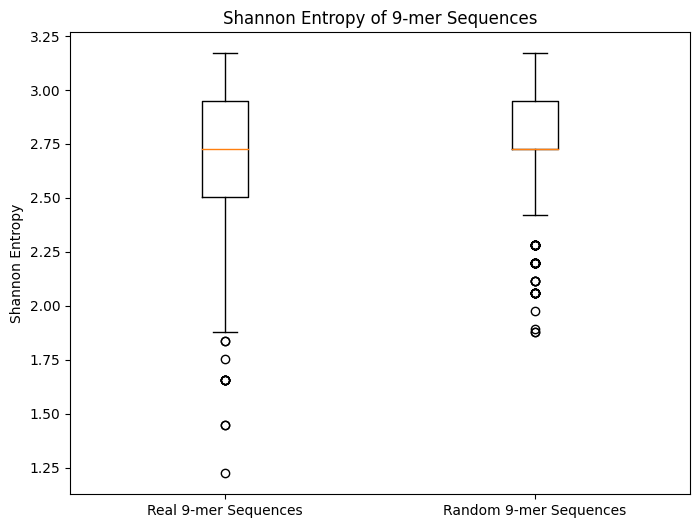

In [ ]:
import matplotlib.pyplot as plt

def plot_boxplot(real_entropies, random_entropies):
    data = [real_entropies, random_entropies]
    plt.figure(figsize=(8, 6))

    plt.boxplot(data, labels=['Real 9-mer Sequences', 'Random 9-mer Sequences'])

    plt.title('Shannon Entropy of 9-mer Sequences')
    plt.ylabel('Shannon Entropy')

    plt.show()

real_entropies = shannon_entropies
random_entropies = list(main().values())

plot_boxplot(real_entropies, random_entropies)

**Observations & Conclusions :**
---
---
- The comparison of box plots for real and random 9-mer sequences reveals several intriguing patterns:
  
    - The larger box for real sequences suggests a broader range of complexity and diversity, indicative of the fine-tuned natural variation within protein sequences.
    
    - In contrast, the smaller box for random sequences points to a more constrained distribution, lacking the richness observed in real sequences.
    
    - Despite the difference in box sizes, the median lines are nearly identical, highlighting that the overall average complexity of the two sequence types is similar. This finding implies that while real and random sequences share a similar central tendency, the pathways they take to reach this complexity differ significantly.
    
    - The presence of outliers below the lower quartile in both cases provides insight into potential anomalies or exceptional variations in sequence diversity. However, the random sequences show higher outliers than the real sequences, indicating a greater level of unpredictability in the randomly generated set.
    
- In summary, the data emphasizes the intricacies of real protein sequences, showcasing their adaptability and resilience, while also underscoring the more erratic nature of random sequences. The remarkable consistency in median entropy levels between the two types speaks to a fundamental aspect of sequence complexity, providing fertile ground for further exploration in sequence analysis and optimization.